# Notebook 03: Feature Selection

## 1. Objective
This notebook focuses on identifying the most important features for predicting heart disease using various feature selection techniques. The goals are to:
- Rank features by their importance using multiple methods
- Select the optimal subset of features for modeling
- Reduce dimensionality while maintaining predictive power
- Improve model interpretability and performance

## 2. Introduction to Feature Selection
Feature selection is the process of selecting a subset of relevant features for model construction. It helps to:
- Reduce overfitting
- Improve accuracy
- Reduce training time
- Enhance model interpretability

**Techniques used in this notebook:**
- Feature Importance from Tree-based models
- Recursive Feature Elimination (RFE)
- Statistical methods (Chi-Square, Correlation analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("../data/01_cleaned_data.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [3]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

C:\Users\engjo\AppData\Local\Temp\ipykernel_23312\1101861402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


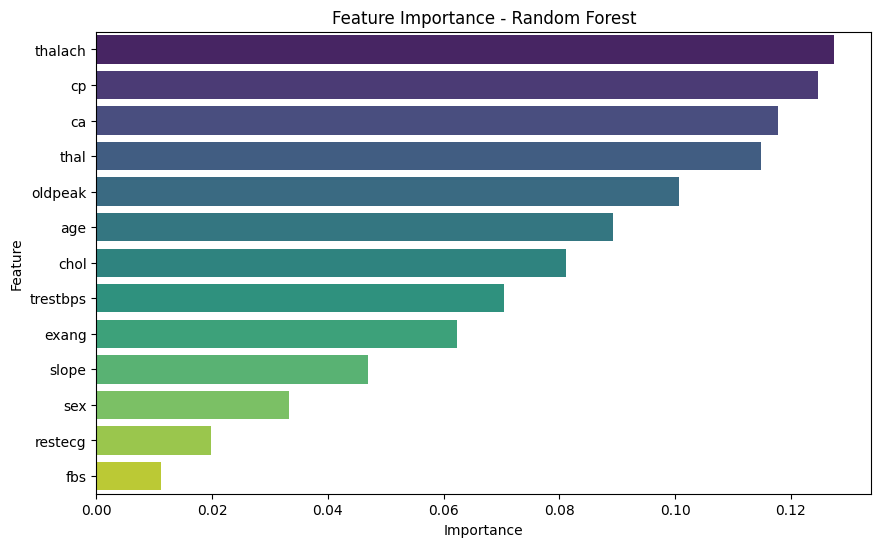

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

In [5]:
log_reg = LogisticRegression(max_iter=2000)

rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("RFE Selected Features:", selected_features_rfe)

RFE Selected Features: Index(['sex', 'cp', 'exang', 'slope', 'ca'], dtype='object')


In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_selector = SelectKBest(score_func=chi2, k=5)
chi_selector.fit(X_scaled, y)

chi_scores = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_selector.scores_})
chi_scores = chi_scores.sort_values(by="Chi2 Score", ascending=False)

print(chi_scores.head())

    Feature  Chi2 Score
12     thal   44.877965
8     exang   38.052613
11       ca   28.038394
9   oldpeak   11.382669
10    slope   10.984336


In [7]:

top_rf = feature_importance["Feature"].head(5).tolist()

top_rfe = selected_features_rfe.tolist()

top_chi = chi_scores["Feature"].head(5).tolist()

print("Top Random Forest:", top_rf)
print("Top RFE:", top_rfe)
print("Top Chi2:", top_chi)

final_features = list(set(top_rf) | set(top_rfe) | set(top_chi))
print("Final Selected Features:", final_features)

X_selected = df[final_features]
X_selected = df[final_features].copy()
X_selected["target"] = y
X_selected.to_csv("../data/03_data_selected_features.csv", index=False)


Top Random Forest: ['thalach', 'cp', 'ca', 'thal', 'oldpeak']
Top RFE: ['sex', 'cp', 'exang', 'slope', 'ca']
Top Chi2: ['thal', 'exang', 'ca', 'oldpeak', 'slope']
Final Selected Features: ['thalach', 'thal', 'ca', 'exang', 'cp', 'oldpeak', 'sex', 'slope']
